In [57]:
import pandas as pd

In [58]:
import openpyxl

In [59]:
file_name = "CrisisDB_Hierarchy_xls.xls" 
sheet_name = 0
header=0
hier_df = pd.read_excel(file_name, sheet_name = sheet_name, header=header)

In [60]:
#hier_df

In [51]:
hier_df['Section'].unique()

Economy Variables              25
Well Being                      2
Social Mobility                 2
Social Complexity Variables     1
Warfare Variables               1
Name: Section, dtype: int64

In [56]:
for item in hier_df['Section'].unique():
    print(f"INSERT INTO core_section (name) VALUES ('{item}');")

INSERT INTO core_section (name) VALUES ('Social Complexity Variables');
INSERT INTO core_section (name) VALUES ('Economy Variables');
INSERT INTO core_section (name) VALUES ('Warfare Variables');
INSERT INTO core_section (name) VALUES ('Social Mobility');
INSERT INTO core_section (name) VALUES ('Well Being');


In [61]:
hier_df['Section'].unique()

array(['Social Complexity Variables', 'Economy Variables',
       'Warfare Variables', 'Social Mobility', 'Well Being'], dtype=object)

## Subsection

#### We first use the Django shell to update the section_id dics

In [87]:
all_secs_with_id_dic = {'Social Complexity Variables': 17, 'Economy Variables': 18, 'Warfare Variables': 19, 'Social Mobility': 20, 'Well Being': 21}

In [88]:
subsection_df = hier_df.drop_duplicates(subset=['Section', 'Subsection'])

In [89]:
new_subsection_df = subsection_df[['Section', 'Subsection']]
new_subsection_df

,Section,Subsection
0,Social Complexity Variables,Social Scale
1,Economy Variables,Taxation
2,Economy Variables,State Finances
4,Economy Variables,Productivity
7,Economy Variables,State Fiscal Health
9,Economy Variables,Wages and Costs
19,Warfare Variables,Internal Conflicts
23,Social Mobility,Advanced Degrees
27,Well Being,Biological Well-Being


In [90]:
for index, row in new_subsection_df.iterrows():
    print(row['Section'], row['Subsection'])

Social Complexity Variables Social Scale
Economy Variables Taxation
Economy Variables State Finances
Economy Variables Productivity
Economy Variables State Fiscal Health
Economy Variables Wages and Costs
Warfare Variables Internal Conflicts
Social Mobility Advanced Degrees
Well Being Biological Well-Being


<hr>

#### note that, section_id is the way to refer to the section col on the subsection table

In [98]:
for index, row in new_subsection_df.iterrows():    
    sec_id = all_secs_with_id_dic[row['Section']]
    subsection_name = row['Subsection']
    print(f"INSERT INTO core_subsection (name, section_id) VALUES ('{subsection_name}', {sec_id});")

INSERT INTO core_subsection (name, section_id) VALUES ('Social Scale', 17);
INSERT INTO core_subsection (name, section_id) VALUES ('Taxation', 18);
INSERT INTO core_subsection (name, section_id) VALUES ('State Finances', 18);
INSERT INTO core_subsection (name, section_id) VALUES ('Productivity', 18);
INSERT INTO core_subsection (name, section_id) VALUES ('State Fiscal Health', 18);
INSERT INTO core_subsection (name, section_id) VALUES ('Wages and Costs', 18);
INSERT INTO core_subsection (name, section_id) VALUES ('Internal Conflicts', 19);
INSERT INTO core_subsection (name, section_id) VALUES ('Advanced Degrees', 20);
INSERT INTO core_subsection (name, section_id) VALUES ('Biological Well-Being', 21);


## Variables:

In [102]:
# To get this use seshat.utils.utils.section_dic_extractor

all_secs_with_id_dic = {'Social Complexity Variables': 17, 'Economy Variables': 18, 'Warfare Variables': 19, 'Social Mobility': 20, 'Well Being': 21}

In [103]:
# To get this use seshat.utils.utils.subsection_dic_extractor

all_subsec_ids = {'Social Scale': 12, 'Taxation': 13, 'State Finances': 14, 'Productivity': 15, 'State Fiscal Health': 16, 'Wages and Costs': 17, 'Internal Conflicts': 18, 'Advanced Degrees': 19, 'Biological Well-Being': 20}

In [105]:
file_name = "CrisisDB_Hierarchy_xls.xls" 
sheet_name = 0
header=0
var_df = pd.read_excel(file_name, sheet_name = sheet_name, header=header)

In [109]:
for index, row in var_df.iterrows():    
    sec_id = all_secs_with_id_dic[row['Section']]
    subsec_id = all_subsec_ids[row['Subsection']]
    var_name = row['Variable']
    print(f"INSERT INTO core_variablehierarchy (name, section_id, subsection_id, is_verified) VALUES ('{var_name}', {sec_id}, {subsec_id}, True);")

INSERT INTO core_variablehierarchy (name, section_id, subsection_id, is_verified) VALUES ('Population', 17, 12, True);
INSERT INTO core_variablehierarchy (name, section_id, subsection_id, is_verified) VALUES ('Total_tax', 18, 13, True);
INSERT INTO core_variablehierarchy (name, section_id, subsection_id, is_verified) VALUES ('Total_revenue', 18, 14, True);
INSERT INTO core_variablehierarchy (name, section_id, subsection_id, is_verified) VALUES ('Total_expenditure', 18, 14, True);
INSERT INTO core_variablehierarchy (name, section_id, subsection_id, is_verified) VALUES ('Total_economic_output', 18, 15, True);
INSERT INTO core_variablehierarchy (name, section_id, subsection_id, is_verified) VALUES ('Tariff_and_transit', 18, 13, True);
INSERT INTO core_variablehierarchy (name, section_id, subsection_id, is_verified) VALUES ('Salt_tax', 18, 13, True);
INSERT INTO core_variablehierarchy (name, section_id, subsection_id, is_verified) VALUES ('Revenue_real', 18, 16, True);
INSERT INTO core_var

<class 'int'>
1
2
3
<class 'int'>
(3.0, 4.0)
(5.0, 8.0)
(7.0, 9.0)
3.905124837953327
[3. 5. 7.]
[4. 8. 9.]
<class 'shapely.geometry.linestring.LineString'>
(4.0, 5.0, -1.2597607655874832, -0.20124742985593216)


/usr/lib/python3.8/tkinter/__init__.py:1892: RankWarning: Polyfit may be poorly conditioned
  return self.func(*args)


(3.0, 4.0)
(5.0, 8.0)
(7.0, 9.0)
3.905124837953327
[3. 5. 7.]
[4. 8. 9.]
<class 'shapely.geometry.linestring.LineString'>
(4.0, 5.0, -1.2597607655874832, -0.20124742985593216)


/usr/lib/python3.8/tkinter/__init__.py:1892: RankWarning: Polyfit may be poorly conditioned
  return self.func(*args)


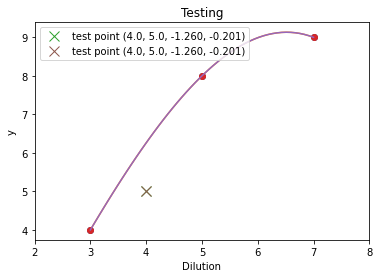

In [66]:
from tkinter import *

root = Tk()

labelText=StringVar()
labelText.set("Number of points you have: ")
labelTop=Label(root, textvariable=labelText, height=2)
#labelDir.pack(side="left")

directory=StringVar(None)
num_points=Entry(root,textvariable=directory,width=10)
#dirname.pack(side="left")
empty_label= Label(root, text="     ")

labelText=StringVar()
labelText.set("Number of points you want to test: ")
labelTop2=Label(root, textvariable=labelText, height=2)
#labelDir.pack(side="left")

directory=StringVar(None)
num_points2=Entry(root,textvariable=directory,width=10)
#dirname.pack(side="left")
empty_label= Label(root, text="     ")


num_points.grid(row=0, column=1, padx=20, pady=2)

my_xs = []
my_ys = []
label_xs = []
label_ys = []

my_xs_test = []
my_ys_test = []
label_xs_test = []
label_ys_test = []

dirname = []
labelDir = []


def myClick():
    my_points_num = int(num_points.get())
    print(type(my_points_num))
    for i in range(my_points_num):
        labelText=StringVar()
        labelText.set(f"Point {i+1} (x-value): ")
        label_xs.append(Label(root, textvariable=labelText, height=2))
        #labelDir.pack(side="left")

        directory=StringVar(None)
        my_xs.append(Entry(root,textvariable=directory,width=15))
        
        labelText=StringVar()
        labelText.set(f"Point {i+1} (y-value): ")
        label_ys.append(Label(root, textvariable=labelText, height=2))
        #labelDir.pack(side="left")

        directory=StringVar(None)
        my_ys.append(Entry(root,textvariable=directory,width=15))
        
        label_xs[i].grid(row=i+1, column=0, padx=10, pady=2)
        my_xs[i].grid(row=i+1, column=1, padx=10, pady=2)
        
        label_ys[i].grid(row=i+1, column=2, padx=10, pady=2)
        my_ys[i].grid(row=i+1, column=3, padx=10, pady=2)
        
        myButtonAdd.grid(row=i+1, column=4, padx=10, pady=2)
        print(i+1)
        
    my_points_num2 = int(num_points2.get())
    print(type(my_points_num2))
    for i in range(my_points_num2):
        labelText=StringVar()
        labelText.set(f"Point {i+1} (x-value) for testing: ")
        label_xs_test.append(Label(root, textvariable=labelText, height=2))
        #labelDir.pack(side="left")

        directory=StringVar(None)
        my_xs_test.append(Entry(root,textvariable=directory,width=15))
        
        labelText=StringVar()
        labelText.set(f"Point {i+1} (y-value) for testing: ")
        label_ys_test.append(Label(root, textvariable=labelText, height=2))
        #labelDir.pack(side="left")

        directory=StringVar(None)
        my_ys_test.append(Entry(root,textvariable=directory,width=15))
        
        label_xs_test[i].grid(row=my_points_num+i+1, column=0, padx=10, pady=2)
        my_xs_test[i].grid(row=my_points_num+i+1, column=1, padx=10, pady=2)
        
        label_ys_test[i].grid(row=my_points_num+i+1, column=2, padx=10, pady=2)
        my_ys_test[i].grid(row=my_points_num+i+1, column=3, padx=10, pady=2)
        
        myButtonAddTest.grid(row=my_points_num+i+1, column=4, padx=10, pady=2)

def myClickPoints():
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

#     x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
#     y = np.array([240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

#     plt.plot(x, y)

#     plt.xlabel("x")
#     plt.ylabel("y")
    

#     plt.show()
    
    points_list_for_matplot = []
    for i in range(len(my_xs)):
        my_tuple = (float(my_xs[i].get()), float(my_ys[i].get()))
        points_list_for_matplot.append(my_tuple)
        print(my_tuple)
    points = np.array(points_list_for_matplot)

    line = geom.LineString(points_list)
    point = geom.Point(2.5,9)

    print(point.distance(line))

    # get x and y vectors
    x = points[:,0]
    y = points[:,1]

    print(x)
    print(y)

    print(type(line))

    # calculate polynomial
    z = np.polyfit(x, y, 3)
    f = np.poly1d(z)

    # calculate new x's and y's
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = f(x_new)
    
    points_list_for_test = []
    for i in range(len(my_xs_test)):
        x_test = float(my_xs_test[i].get())
        y_test = float(my_ys_test[i].get())
        my_tuple = (x_test, y_test, y_test - f(x_test),((y_test - f(x_test))/f(x_test)))
        points_list_for_test.append(my_tuple)
        print(my_tuple)

    #point_on_graph_with_same_x = f(2.5)
    #point_on_graph_with_same_y = np.interp(8, y_new, x_new)

    #print(point_on_graph_with_same_y)
    #x_p = [2.5]
    #y_p = [8]


    plt.title("Testing")
    plt.xlabel("Dilution")
    plt.ylabel("y")

    plt.plot(x,y,'o', x_new, y_new,)
    for item in points_list_for_test:
        plt.plot(item[0], item[1],'x', markersize=10, label=f"test point ({item[0]}, {item[1]}, {item[2]:.3f}, {item[3]:.3f})")
    #plt.plot(x_p, point_on_graph_with_same_x,'o', markersize=10, label="distance to x")
    #plt.plot(point_on_graph_with_same_y, y_p,'o', markersize=10, label="distance to y")

    plt.legend(loc="upper left")


    plt.xlim([x[0]-1, x[-1] + 1 ])

    plt.grid()
    
    plt.savefig("myImagePDF_best_final.pdf", format="pdf", bbox_inches="tight")
    
    with open('readme.txt', 'w') as f:
        f.write('readme')
    
    plt.show

#     x1 = float(num_points.get())
#     my_points_num = int(num_points.get())
#     print(type(my_points_num))
#     for i in range(my_points_num):
#         labelText=StringVar()
#         labelText.set(f"Please enter point {i+1} (x): ")
#         labelDir=Label(root, textvariable=labelText, height=5)
#         #labelDir.pack(side="left")

#         directory=StringVar(None)
#         dirname=Entry(root,textvariable=directory,width=5)
        
#         labelDir.grid(row=i+1, column=0, padx=20, pady=2)
#         dirname.grid(row=i+1, column=1, padx=20, pady=2)
#         myButtonAdd.grid(row=i+1, column=2, padx=20, pady=2)
        
myButton = Button(root, text="Enter", padx=30, command=myClick)
myButtonAdd = Button(root, text="Add Points", padx=10, command=myClickPoints)
myButtonAddTest = Button(root, text="Add Test Points", padx=10, command=myClickPoints)


labelTop.grid(row=0, column=0, padx=10, pady=2)
num_points.grid(row=0, column=1, padx=10, pady=2)
labelTop2.grid(row=0, column=2, padx=10, pady=2)
num_points2.grid(row=0, column=3, padx=10, pady=2)
myButton.grid(row=0, column=4, padx=10, pady=2)



# e = Entry(root, width=40, borderwidth = 5)
# e.pack()
# e.insert(0, "Enter your first point (x)")
# myLabel1 = Label(root, text="New Software for interpolation")
# myLabel2 = Label(root, text="New Software for You")
# myLabel1.pack()
# myLabel2.pack()

# def myClick():
#     myNewLabel = Label(root, text=e.get())
#     myNewLabel.pack()
# myButton = Button(root, text="Click here!", padx=50, command=myClick)
# myButton.pack()

root.mainloop()



In [64]:
(4.0 - 5.0)/5.0

-0.2

Please enter the number of points you have: 3
Point 1 (x): 1
Point 1 (y): 2
[(1.0, 2.0)]
Point 2 (x): 3
Point 2 (y): 4
[(1.0, 2.0), (3.0, 4.0)]
Point 3 (x): 5
Point 3 (y): 6
[(1.0, 2.0), (3.0, 4.0), (5.0, 6.0)]
3.905124837953327
[1. 3. 5.]
[2. 4. 6.]
<class 'shapely.geometry.linestring.LineString'>
5.0


/home/majid/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3427: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


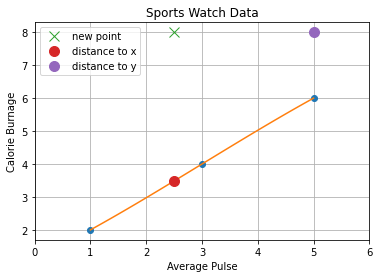

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as geom

inp_num_points_str = input('Please enter the number of points you have: ')

inp_num_points = int(inp_num_points_str)
points_list = []
for i in range(inp_num_points):
    inp_x1 = float(input(f'Point {i+1} (x): '))
    inp_x2 = float(input(f'Point {i+1} (y): '))
    points_list.append((inp_x1, inp_x2))
    print(points_list)

points = np.array(points_list)

line = geom.LineString(points)
point = geom.Point(2.5,9)

print(point.distance(line))

# get x and y vectors
x = points[:,0]
y = points[:,1]

print(x)
print(y)

print(type(line))

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

point_on_graph_with_same_x = f(2.5)
point_on_graph_with_same_y = np.interp(8, y_new, x_new)

print(point_on_graph_with_same_y)
x_p = [2.5]
y_p = [8]


plt.title("Sports Watch Data")
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")

plt.plot(x,y,'o', x_new, y_new,)
plt.plot(x_p, y_p,'x', markersize=10, label="new point")
plt.plot(x_p, point_on_graph_with_same_x,'o', markersize=10, label="distance to x")
plt.plot(point_on_graph_with_same_y, y_p,'o', markersize=10, label="distance to y")

plt.legend(loc="upper left")


plt.xlim([x[0]-1, x[-1] + 1 ])

plt.grid()
plt.show()

0.025580982739200116


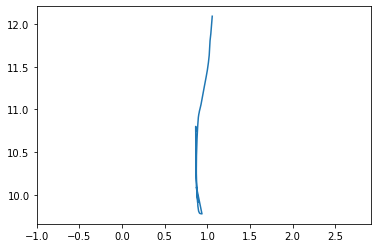

In [136]:
import shapely.geometry as geom
import numpy as np

coords = np.loadtxt('points.txt')

line = geom.LineString(coords)
point = geom.Point(0.9, 10.5)

# Note that "line.distance(point)" would be identical
print(point.distance(line))
fig, ax = plt.subplots()
ax.plot(*coords.T)
ax.axis('equal')
NearestPoint(line, ax)
plt.show()


Please enter the number of points you have: 3
Point 1 (x): 1
Point 1 (y): 2
[(1.0, 2.0)]
Point 2 (x): 3
Point 2 (y): 4
[(1.0, 2.0), (3.0, 4.0)]
Point 3 (x): 5
Point 3 (y): 6
[(1.0, 2.0), (3.0, 4.0), (5.0, 6.0)]
3.905124837953327
[1. 3. 5.]
[2. 4. 6.]
<class 'shapely.geometry.linestring.LineString'>
5.0


/home/majid/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3427: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


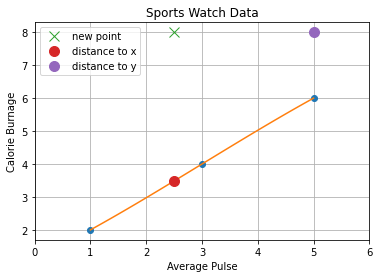

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as geom

inp_num_points_str = input('Please enter the number of points you have: ')

inp_num_points = int(inp_num_points_str)
points_list = []
for i in range(inp_num_points):
    inp_x1 = float(input(f'Point {i+1} (x): '))
    inp_x2 = float(input(f'Point {i+1} (y): '))
    points_list.append((inp_x1, inp_x2))
    print(points_list)

points = np.array(points_list)

line = geom.LineString(points)
point = geom.Point(2.5,9)

print(point.distance(line))

# get x and y vectors
x = points[:,0]
y = points[:,1]

print(x)
print(y)

print(type(line))

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

point_on_graph_with_same_x = f(2.5)
point_on_graph_with_same_y = np.interp(8, y_new, x_new)

print(point_on_graph_with_same_y)
x_p = [2.5]
y_p = [8]


plt.title("Sports Watch Data")
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")

plt.plot(x,y,'o', x_new, y_new,)
plt.plot(x_p, y_p,'x', markersize=10, label="new point")
plt.plot(x_p, point_on_graph_with_same_x,'o', markersize=10, label="distance to x")
plt.plot(point_on_graph_with_same_y, y_p,'o', markersize=10, label="distance to y")

plt.legend(loc="upper left")


plt.xlim([x[0]-1, x[-1] + 1 ])

plt.grid()
plt.show()